In [2]:
!pip install sportypy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


MovieWriter imagemagick unavailable; using Pillow instead.


frame: 180009.00
len(frame_data): 1
len(players), len(balls): 1 1
frame: 180009.00
len(frame_data): 1
len(players), len(balls): 1 1
frame: 180009.00
len(frame_data): 1
len(players), len(balls): 1 1
frame: 180009.00
len(frame_data): 1
len(players), len(balls): 1 1
frame: 180117.33
len(frame_data): 6
len(players), len(balls): 6 6
frame: 180225.67
len(frame_data): 10
len(players), len(balls): 10 10
frame: 180334.00
len(frame_data): 13
len(players), len(balls): 13 13
frame: 180442.33
len(frame_data): 17
len(players), len(balls): 17 17
frame: 180550.67
len(frame_data): 21
len(players), len(balls): 21 21
frame: 180659.00
len(frame_data): 28
len(players), len(balls): 28 28
frame: 180767.33
len(frame_data): 38
len(players), len(balls): 38 38
frame: 180875.67
len(frame_data): 46
len(players), len(balls): 46 46
frame: 180984.00
len(frame_data): 50
len(players), len(balls): 50 50


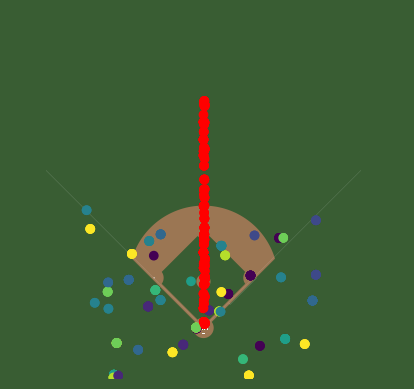

In [3]:
import pandas as pd
from sportypy.surfaces import MiLBField
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# The dimensions are not exactly like this but this is an example if you need something to go off of

num_rows = 50

np.random.seed(0)  # it will always generate the same data - so it is simpler to compare them 

data = {
    'game_str': ['game_01'] * num_rows,
    'play_id': [10] * num_rows,
    'timestamp': np.random.randint(180000, 181000, size=num_rows),
    'player_position': np.random.randint(1, 11, size=num_rows),
    'field_x': np.random.uniform(-150, 150, size=num_rows),
    'field_y': np.random.uniform(-150, 150, size=num_rows),
    'ball_position_x': np.random.uniform(0.0, 2.0, size=num_rows),
    'ball_position_y': np.random.uniform(0.0, 300.0, size=num_rows),
    'ball_position_z': np.random.uniform(0.0, 10.0, size=num_rows)
}

df = pd.DataFrame(data).sort_values(by='timestamp')

field = MiLBField()

# it shows white background with green triangle 
#fig, ax = plt.subplots(1, 1)  # get figure before drawing
#field.draw(display_range='full', ax=ax)

# it shows green background with green triangle 
field.draw(display_range='full')  # without ax=
fig = plt.gcf()  # get figure after drawing

def update(frame):
    print(f'frame: {frame:.2f}')

    frame_data = df[ df['timestamp'] <= frame ]
    #frame_data = df[ df['timestamp'] <= frame ].drop_duplicates(subset=['player_position'], keep='last')
    print('len(frame_data):', len(frame_data))
    
    players = frame_data  # no need [['field_x', 'field_y']]
    balls   = frame_data  # no need [['ball_position_x', 'ball_position_y']]
    #players = frame_data.drop_duplicates(subset=['player_position'], keep='last')
    print('len(players), len(balls):', len(players), len(balls))

    players_colors = players['player_position']
    balls_colors   = ['red'] * len(balls)
    
    p = field.scatter(players['field_x'], players['field_y'], c=players_colors)
    b = field.scatter(balls['ball_position_x'], balls['ball_position_y'], c=balls_colors)
    
    return p, b

ani = FuncAnimation(fig, update, frames=np.linspace(df['timestamp'].min(), df['timestamp'].max(), num=10), blit=True)

ani.save('animation.gif', writer='imagemagick', fps=2)

plt.show()

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
results = model.train(data="data.yaml", epochs=50, imgsz=640, augment=True)

New https://pypi.org/project/ultralytics/8.3.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.55 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning /home/nova/Downloads/text.v1i.yolov11/train/labels... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<00:00, 1930.39it/s]

train: New cache created: /home/nova/Downloads/text.v1i.yolov11/train/labels.cache



val: Scanning /home/nova/Downloads/text.v1i.yolov11/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 831.01it/s]

val: New cache created: /home/nova/Downloads/text.v1i.yolov11/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.49G     0.7688      3.431      1.009          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all          4          4    0.00333          1      0.693      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.47G     0.7393      2.556     0.9444          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.38it/s]

                   all          4          4    0.00333          1      0.845      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.49G     0.7578      1.872      0.896          6        640: 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.19it/s]

                   all          4          4      0.642          1      0.995      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.48G     0.7198      1.658     0.9203          7        640: 100%|██████████| 9/9 [00:00<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.12it/s]

                   all          4          4      0.579        0.5      0.788      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.49G     0.8284      1.837     0.9635          6        640: 100%|██████████| 9/9 [00:00<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.05it/s]

                   all          4          4      0.973          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.49G     0.8014      1.677     0.9833          5        640: 100%|██████████| 9/9 [00:00<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.27it/s]

                   all          4          4      0.184      0.455      0.249       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.49G     0.8115      1.609     0.9555          6        640: 100%|██████████| 9/9 [00:00<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.67it/s]

                   all          4          4      0.563      0.657      0.745      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.49G     0.8482      3.278     0.9862          1        640: 100%|██████████| 9/9 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.53it/s]

                   all          4          4      0.967          1      0.995       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.49G     0.6791      1.367     0.9077          4        640: 100%|██████████| 9/9 [00:00<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.19it/s]

                   all          4          4      0.181       0.25      0.193      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.49G     0.6985      1.483      0.976          4        640: 100%|██████████| 9/9 [00:00<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.45it/s]

                   all          4          4          1      0.745      0.945      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.49G     0.7947       1.49      1.008          2        640: 100%|██████████| 9/9 [00:00<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.94it/s]

                   all          4          4      0.782          1      0.895      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.49G     0.7315      1.285     0.9448          4        640: 100%|██████████| 9/9 [00:00<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 34.46it/s]

                   all          4          4       0.98          1      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.48G       0.63      1.075     0.9145          5        640: 100%|██████████| 9/9 [00:00<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.14it/s]

                   all          4          4      0.739      0.718      0.691      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.49G     0.6665      1.187      0.917          5        640: 100%|██████████| 9/9 [00:00<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.68it/s]

                   all          4          4      0.736       0.75      0.808      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.49G     0.6544      1.168     0.9245          7        640: 100%|██████████| 9/9 [00:00<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.49it/s]

                   all          4          4       0.64          1      0.828      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.49G     0.5502      1.052     0.8763          7        640: 100%|██████████| 9/9 [00:00<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.39it/s]

                   all          4          4          1      0.954      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.48G     0.5862      0.914     0.8693          4        640: 100%|██████████| 9/9 [00:00<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.88it/s]

                   all          4          4      0.982          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.49G     0.5923     0.9853     0.9055          6        640: 100%|██████████| 9/9 [00:00<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 34.47it/s]

                   all          4          4      0.979          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.49G     0.6351     0.9943     0.9163          7        640: 100%|██████████| 9/9 [00:00<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 34.08it/s]

                   all          4          4      0.992          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.49G      0.593     0.9424     0.9203          4        640: 100%|██████████| 9/9 [00:00<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.51it/s]

                   all          4          4          1      0.708      0.912      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.48G     0.5514     0.8375     0.8834          6        640: 100%|██████████| 9/9 [00:00<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.61it/s]

                   all          4          4          1       0.75      0.804      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.49G     0.4944     0.9572     0.8812          1        640: 100%|██████████| 9/9 [00:00<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.38it/s]

                   all          4          4      0.918       0.75      0.888      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.49G     0.6054     0.8471     0.9047          4        640: 100%|██████████| 9/9 [00:00<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.62it/s]

                   all          4          4       0.78          1      0.945      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.49G     0.5971     0.8553     0.9137          5        640: 100%|██████████| 9/9 [00:00<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.15it/s]

                   all          4          4          1      0.976      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.48G     0.5032      0.811     0.8613          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.41it/s]

                   all          4          4      0.946       0.75      0.912      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.49G     0.4903     0.7627     0.8863          5        640: 100%|██████████| 9/9 [00:00<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.33it/s]

                   all          4          4      0.792          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.49G     0.5001     0.7149     0.8801          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.74it/s]

                   all          4          4      0.987          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.49G     0.5014     0.6623     0.8618          5        640: 100%|██████████| 9/9 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 34.56it/s]

                   all          4          4       0.99          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.48G     0.5138     0.6395     0.8645          5        640: 100%|██████████| 9/9 [00:00<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.96it/s]

                   all          4          4      0.994          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.49G     0.4811     0.6425     0.8662          5        640: 100%|██████████| 9/9 [00:00<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.12it/s]

                   all          4          4      0.989          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.49G     0.4837     0.6628     0.8533          4        640: 100%|██████████| 9/9 [00:00<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.19it/s]


                   all          4          4          1      0.998      0.995       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.49G     0.4726     0.6491     0.8854          4        640: 100%|██████████| 9/9 [00:00<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.35it/s]

                   all          4          4      0.987          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.48G     0.6442     0.8033     0.9034          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.11it/s]


                   all          4          4       0.99          1      0.995      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.49G     0.4597      0.592     0.8887          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.33it/s]

                   all          4          4      0.974          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.49G      0.498     0.6156     0.8871          4        640: 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.00it/s]

                   all          4          4      0.989          1      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.49G     0.4327     0.5646     0.8579          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.21it/s]

                   all          4          4      0.979          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.48G       0.43     0.5374     0.8383          8        640: 100%|██████████| 9/9 [00:00<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.45it/s]


                   all          4          4      0.988          1      0.995      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.49G     0.4163     0.5358      0.864          6        640: 100%|██████████| 9/9 [00:00<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.34it/s]


                   all          4          4      0.989          1      0.995      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.49G     0.4167     0.5357     0.8715          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.97it/s]

                   all          4          4       0.99          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.49G     0.3847     0.5411     0.8525          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.22it/s]

                   all          4          4      0.989          1      0.995      0.877


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.48G     0.3653     0.5979     0.8753          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.34it/s]

                   all          4          4      0.988          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.49G     0.3701     0.6245     0.8543          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.57it/s]

                   all          4          4      0.987          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.49G     0.3981     0.6573     0.8647          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.98it/s]

                   all          4          4      0.988          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.49G     0.3782     0.5862     0.8669          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.09it/s]

                   all          4          4      0.988          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.48G      0.342     0.5617     0.8836          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.28it/s]

                   all          4          4      0.988          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.49G     0.3669      0.561     0.8894          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.53it/s]

                   all          4          4      0.988          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.49G     0.3242     0.5441     0.8466          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.02it/s]

                   all          4          4      0.988          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.49G     0.4024      0.604     0.8937          3        640: 100%|██████████| 9/9 [00:00<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.26it/s]

                   all          4          4      0.989          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.48G      0.351     0.5616      0.844          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 46.53it/s]

                   all          4          4      0.989          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.49G     0.3122     0.5469     0.8413          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.15it/s]

                   all          4          4      0.989          1      0.995      0.895



50 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7940MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]


                   all          4          4      0.986          1      0.995      0.827
Speed: 0.3ms preprocess, 38.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


In [4]:
!pip install pytesseract

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('/home/nova/Downloads/text.v1i.yolov11/runs/detect/train2/weights/text.pt')  # load a pretrained YOLO segmentation model

# Open the video file
cap = cv2.VideoCapture("/home/nova/Videos/try.mp4")

# Get the width, height, and FPS of the video
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Set up video writer to save output
writer = cv2.VideoWriter("Ultralytics_circle_annotation.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

# Loop through the video frames
while True:
    ret, im0 = cap.read()
    if not ret:
        break

    # Create an Annotator instance for the current frame
    annotator = Annotator(im0)

    # Perform detection
    results = model.predict(im0)

    # Get the detected bounding boxes and classes
    boxes = results[0].boxes.xyxy.tolist()  # Get bounding boxes as a list
    clss = results[0].boxes.cls.tolist()  # Get classes as a list

    # Annotate the image with circles and labels
    for box, cls in zip(boxes, clss):
        annotator.circle_label(box, label=str(int(cls)))  # Using str() for the label

    # Write the annotated frame to the output video
    writer.write(im0)

    # Show the annotated frame
    cv2.imshow("Ultralytics Circle Annotation", im0)

    # Exit the loop if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources after processing
writer.release()
cap.release()
cv2.destroyAllWindows()



0: 384x640 1 text, 38.8ms
Speed: 1.3ms preprocess, 38.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 5.5ms
Speed: 1.7ms preprocess, 5.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/nova/.local/lib/python3.12/site-packages/cv2/qt/plugins"



0: 384x640 1 text, 5.2ms
Speed: 1.1ms preprocess, 5.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 5.0ms
Speed: 1.1ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.6ms
Speed: 1.5ms preprocess, 4.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 5.1ms
Speed: 1.2ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.4ms
Speed: 1.4ms preprocess, 4.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.6ms
Speed: 1.2ms preprocess, 4.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.8ms
Speed: 1.4ms preprocess, 4.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.9m

In [1]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
import pytesseract

# Load the YOLO model
model = YOLO('/home/nova/Downloads/text.v1i.yolov11/runs/detect/train2/weights/best.pt')  # load a pretrained YOLO segmentation model

# Open the video file
cap = cv2.VideoCapture("/home/nova/Videos/try.mp4")

# Get the width, height, and FPS of the video
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Set up video writer to save output
writer = cv2.VideoWriter("Ultralytics_circle_annotation.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

# Loop through the video frames
while True:
    ret, im0 = cap.read()
    if not ret:
        break

    # Create an Annotator instance for the current frame
    annotator = Annotator(im0)

    # Perform detection
    results = model.predict(im0)

    # Get the detected bounding boxes and classes
    boxes = results[0].boxes.xyxy.tolist()  # Get bounding boxes as a list
    clss = results[0].boxes.cls.tolist()  # Get classes as a list

    # Annotate the image with circles and labels
    for box, cls in zip(boxes, clss):
        annotator.circle_label(box, label=str(int(cls)))  # Using str() for the label

        # Crop the image area inside the bounding box to apply OCR
        x1, y1, x2, y2 = map(int, box)  # Convert to integer
        cropped_img = im0[y1:y2, x1:x2]  # Crop the region from the original image

        # Use Tesseract to extract text from the cropped image
        extracted_text = pytesseract.image_to_string(cropped_img)

        # Display the extracted text in the image (optional)
        cv2.putText(im0, extracted_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

    # Write the annotated frame to the output video
    writer.write(im0)

    # Show the annotated frame
    cv2.imshow("Ultralytics Circle Annotation", im0)

    # Exit the loop if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources after processing
writer.release()
cap.release()
cv2.destroyAllWindows()



0: 384x640 1 text, 41.5ms
Speed: 2.1ms preprocess, 41.5ms inference, 313.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.4ms
Speed: 2.0ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/nova/.local/lib/python3.12/site-packages/cv2/qt/plugins"



0: 384x640 1 text, 5.6ms
Speed: 1.5ms preprocess, 5.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.4ms
Speed: 1.3ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.3ms
Speed: 1.1ms preprocess, 4.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.6ms
Speed: 1.1ms preprocess, 4.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.5ms
Speed: 1.1ms preprocess, 4.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.2ms
Speed: 1.5ms preprocess, 4.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.5ms
Speed: 1.3ms preprocess, 4.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 text, 4.3m

In [1]:
import torch
import os
import pathlib
from super_gradients.training import models
from super_gradients.common.object_names import Models

ModuleNotFoundError: No module named 'super_gradients'

In [5]:
!pip install -qq super-gradients==3.7.1
!pip install -qq tensorrt~=8.6 pycuda pytorch-quantization==2.1.2 --extra-index-url https://pypi.ngc.nvidia.com

ERROR: Could not find a version that satisfies the requirement onnxruntime==1.15.0 (from super-gradients) (from versions: 1.17.0, 1.17.1, 1.17.3, 1.18.0, 1.18.1, 1.19.0, 1.19.2, 1.20.0, 1.20.1)
ERROR: No matching distribution found for onnxruntime==1.15.0
^C
ERROR: Operation cancelled by user


In [1]:
!pip install super_gradients

  Using cached super_gradients-3.7.1-py3-none-any.whl.metadata (41 kB)
  Using cached torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached boto3-1.35.96-py3-none-any.whl.metadata (6.7 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached Deprecated-1.2.15-py2.py3-none-any.whl.metadata (5.5 kB)
  Using cached scipy-1.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached coverage-5.3.1.tar.gz (684 kB)
  Preparing metadata (setup.py) ... done
  Using cached torchvision-0.20.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached Sphinx-4.0.3-py3-none-any.whl.metadata (8.0 kB)
  Using cached sphinx_rtd_theme-3.0.2-py2.py3-none-any.whl.metadata 

In [5]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo11n-pose.pt")  # load an official model
# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

100%|██████████| 134k/134k [00:00<00:00, 4.87MB/s]


image 1/1 /home/nova/Downloads/text.v1i.yolov11/bus.jpg: 640x480 4 persons, 136.7ms
Speed: 3.0ms preprocess, 136.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
